In [1]:
import pandas as pd
def get_fragments_per_group(df_list: list, library_names: list, group_col: str, count_col) -> pd.DataFrame:
    new_df = pd.DataFrame()
    for i, df in enumerate(df_list):
        # add the number of unique elements from the count column with each group
        new_row = df.groupby(group_col).agg({count_col: 'nunique'}).reset_index()
        # rename count column
        new_row.rename(columns={count_col: 'count'}, inplace=True)
        new_row['library'] = library_names[i]
        new_df = pd.concat([new_df, new_row])
        
    # Sort the dataframe by the count column
    new_df.sort_values(by='count', ascending=False, inplace=True)
        
    return new_df


In [61]:
import pandas as pd
def get_top_fragments_per_group(df_list: list, library_names: list, group_col: str, value_col:str, number_of_top: int=10) -> pd.DataFrame:
    new_df = pd.DataFrame()
    for i, df in enumerate(df_list):
        df['library'] = library_names[i]
        df = df[[group_col, value_col, 'library','LUTnr', 'Peptide', 'Sequence']]
        new_df = pd.concat([new_df, df])
    new_df.sort_values(by=['Group','RNAcount'], ascending=[True,False], inplace=True)
    # add the number of top number of rows with the highest values from the value column with each group
    temp_df = new_df.groupby(group_col).apply(lambda x: x.nlargest(number_of_top, value_col)).reset_index(drop=True)
        
    # Sort the dataframe by the count column
    temp_df.sort_values(by=['Group','RNAcount'], ascending=[True,False], inplace=True)
        
    return temp_df


In [6]:
df_p005 = pd.read_csv("/lunarc/nobackup/projects/lu2024-17-19/J_rAAven/BRAVE/raav-60/p005/final_fragments_summary.csv")
df_p006 = pd.read_csv("/lunarc/nobackup/projects/lu2024-17-19/J_rAAven/BRAVE/raav-60/p006/final_fragments_summary.csv")
df_p007 = pd.read_csv("/lunarc/nobackup/projects/lu2024-17-19/J_rAAven/BRAVE/raav-60/p007/final_fragments_summary.csv")
count_df = get_fragments_per_group([df_p005, df_p006, df_p007],["p005", "p006", "p007"], 'Group', 'LUTnr')

In [63]:
top_nr = 25
top_df = get_top_fragments_per_group([df_p005, df_p006, df_p007],["p005", "p006", "p007"], 'Group', 'RNAcount', top_nr)
top_df.to_csv(f"plots/librarys/top_{top_nr}_fragments.csv", index=False)

/tmp/ipykernel_2072229/1272396554.py:10: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  temp_df = new_df.groupby(group_col).apply(lambda x: x.nlargest(number_of_top, value_col)).reset_index(drop=True)


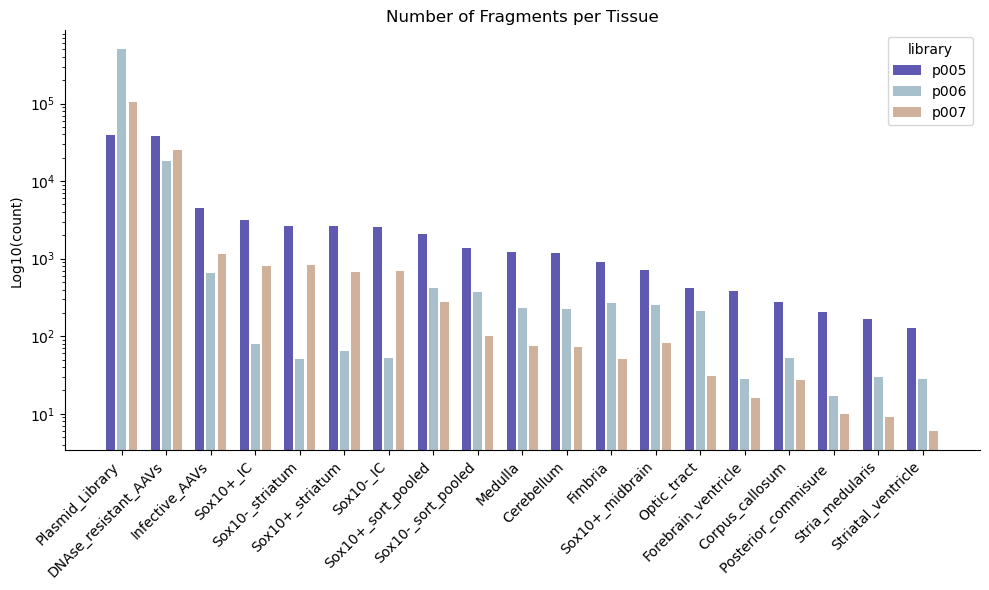

In [3]:
from plotting_functions import create_grouped_barplot
plot = create_grouped_barplot(count_df, 'Group', 'count', 'library')
# save the plot as a png file
plot.savefig("plots/librarys/fragments_per_tissue_comparison.png", dpi=300)

In [59]:
df = df_p007
#df['GeneName'] = df['Origion_seq'].str.split(',').str[5]
df.head()

,Group,Origion_seq,LUTnr,AAstart,AAend,Structure,Peptide,start,end,width,...,RNAcount,RNAcount_ratio,seqlength,BC_count,BC_ratio,BC_adjusted_count_ratio,AAwidth,AAseqlength,AA_pos,AA_rel_pos
0,Cerebellum,AB072387.1,seq_27744,131,138,7aa,GPGEVWV,393,414,21,...,2.0,0.001756,1032,1,0.013699,0.008605,7,344,134,0.389535
1,Cerebellum,AB239756.1,seq_42166,206,213,7aa,GTGTEDS,618,639,21,...,30.0,0.026339,2586,1,0.013699,0.033188,7,862,209,0.242459
2,Cerebellum,AB239756.1,seq_82737,584,591,7aa,LTRALPA,1752,1773,21,...,5.0,0.004390,2586,1,0.013699,0.011239,7,862,587,0.680974
3,Cerebellum,AF063497.1,seq_87556,688,695,7aa,KENSKRW,2064,2085,21,...,1.0,0.000878,2211,1,0.013699,0.007727,7,737,691,0.937585
4,Cerebellum,AF069903.1,seq_40864,199,206,7aa,RTVSSSD,597,618,21,...,6.0,0.005268,1308,1,0.013699,0.012117,7,436,202,0.463303


In [60]:
# get the number of unique LUTnr in each group of the dataframe
df.groupby('Group')['LUTnr'].nunique().sort_values(ascending=False)
# create a new dataframe with Group and number of fragments in that group
group_df = df.groupby('Group').size().reset_index(name='count')
group_df.sort_values(by='count', ascending=False, inplace=True)
group_df.head()
# save the dataframe to a csv file
group_df.to_csv("plots/librarys/p007_fragments_per_group", index=False)

posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values


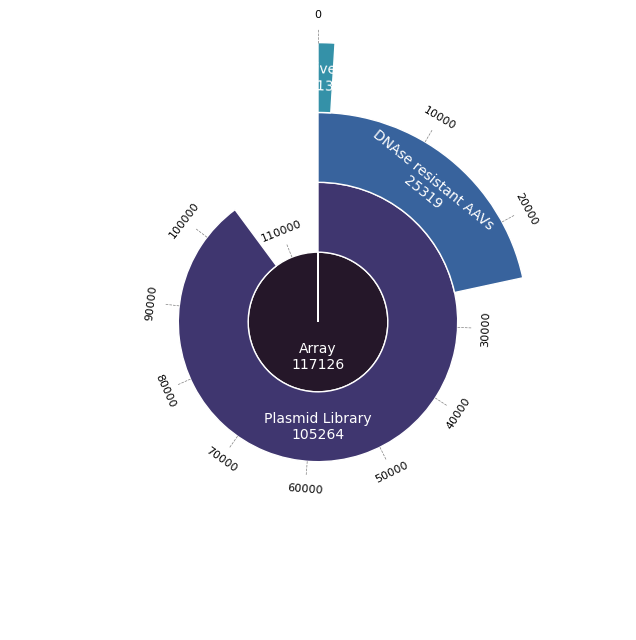

In [63]:
from plotting_functions import plot_quantities
plot = plot_quantities(df,
                {'Plasmid_Library':'Plasmid Library', 'DNAse_resistant_AAVs':'DNAse resistant AAVs', 'Infective_AAVs': 'Infective AAVs'},
                {"Array": 117126}, step_size=10000)

plot.savefig("plots/librarys/p007_quantities.png", dpi=300)

<module 'matplotlib.pyplot' from '/home/jarost/.conda/envs/jupyter/lib/python3.11/site-packages/matplotlib/pyplot.py'>

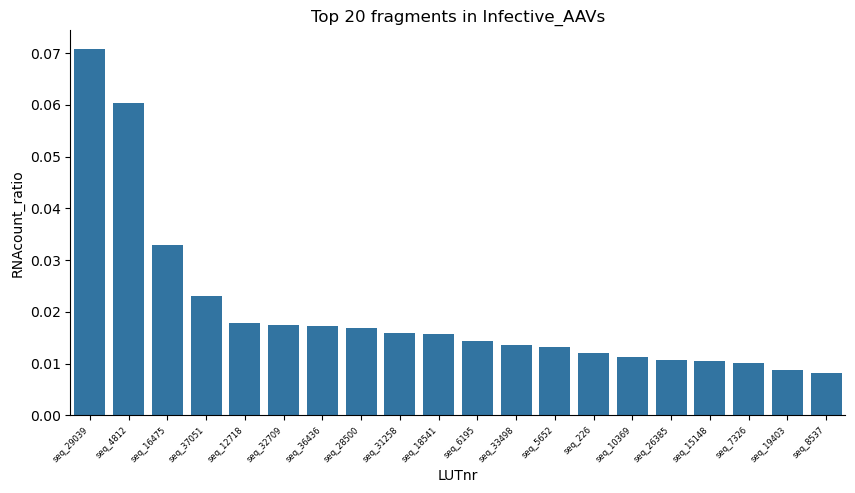

In [57]:
from plotting_functions import plot_top_counts
plot_top_counts(df, 20, 'Infective_AAVs', 'RNAcount_ratio')

In [10]:
# print all unique group names
print(df['Group'].unique())
# print all unqiue gene names
print(df['GeneName'].unique())

['Cerebellum' 'Corpus_callosum' 'DNAse_resistant_AAVs' 'Fimbria'
 'Forebrain_ventricle' 'Infective_AAVs' 'Medulla' 'Optic_tract'
 'Plasmid_Library' 'Posterior_commisure ' 'Sox10+_IC' 'Sox10+_midbrain'
 'Sox10+_sort_pooled' 'Sox10+_striatum' 'Sox10-_IC' 'Sox10-_sort_pooled'
 'Sox10-_striatum' 'Stria_medularis' 'Striatal_ventricle']
['AAV1-VP1' 'AAV6-VP1' 'AAV8-VP1' 'AAV9-VP1' 'BDV-G' 'BDV-CRNP5'
 'BDV-No/98' 'CAV-2-F-SH01' 'CAV-2-F-Toronto A26/61' 'CHIKV-Sp-1'
 'EV71-VP1-1095/Japan 97' 'EV71-VP1-FY23' 'EV71-VP2' 'EV71-VP3' 'EV71-VP4'
 'BV-G' 'HSV-1-pUL1' 'HSV-1-pUL10' 'HSV-1-pUL14' 'HSV-1-pUL16'
 'HSV-1-pUL19' 'HSV-1-pUL21' 'HSV-1-pUL22' 'HSV-1-pUL27' 'HSV-1-pUL35'
 'HSV-1-pUL36' 'HSV-1-pUL37' 'HSV-1-pUL44' 'HSV-1-pUL53' 'HSV-1-pUS4'
 'HSV-1-pUS5' 'HSV-1-pUS6' 'HSV-1-pUS7' 'HSV-1-pUS8' 'HSV-2-pUL1'
 'HSV-2-pUL10' 'HSV-2-pUL19' 'HSV-2-pUL22' 'HSV-2-pUL27' 'HSV-2-pUL44'
 'HSV-2-pUL53' 'HSV-2-pUS4' 'HSV-2-pUS5' 'HSV-2-pUS6' 'HSV-2-pUS7'
 'HSV-2-pUS8' 'HRP' 'HIV-gp120-00NE097' 'HIV-gp120-TH

/lunarc/nobackup/projects/lu2024-17-19/J_rAAven/BRAVE/Plotting_Scripts/plotting_functions.py:122: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_yticklabels([f'{abs(tick):.0f}' for tick in ax.get_yticks()])


<module 'matplotlib.pyplot' from '/home/jarost/.conda/envs/jupyter/lib/python3.11/site-packages/matplotlib/pyplot.py'>

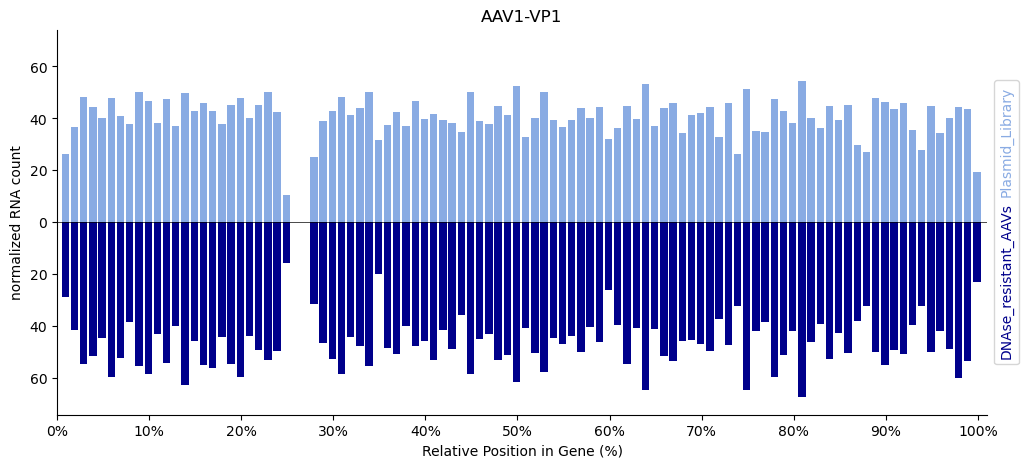

In [11]:
from plotting_functions import plot_rna_counts
df['normalized_RNAcount'] = np.log2(df['RNAcount']+1)
plot_rna_counts(df, "Plasmid_Library", "DNAse_resistant_AAVs", "AAV1-VP1", "normalized_RNAcount", "normalized RNA count")


In [36]:
def get_top_fragment(df, group, n, sort_by, strucutre):
    return df[(df['Group'] == group) & (df['Structure'] == strucutre)].nlargest(n, sort_by)

In [37]:
top_50_inf_aavs = get_top_fragment(df, "Infective_AAVs", 50, "BC_adjusted_count_ratio", "7aa")

KeyError: 'Structure'

<module 'matplotlib.pyplot' from '/home/jarost/.conda/envs/jupyter/lib/python3.11/site-packages/matplotlib/pyplot.py'>

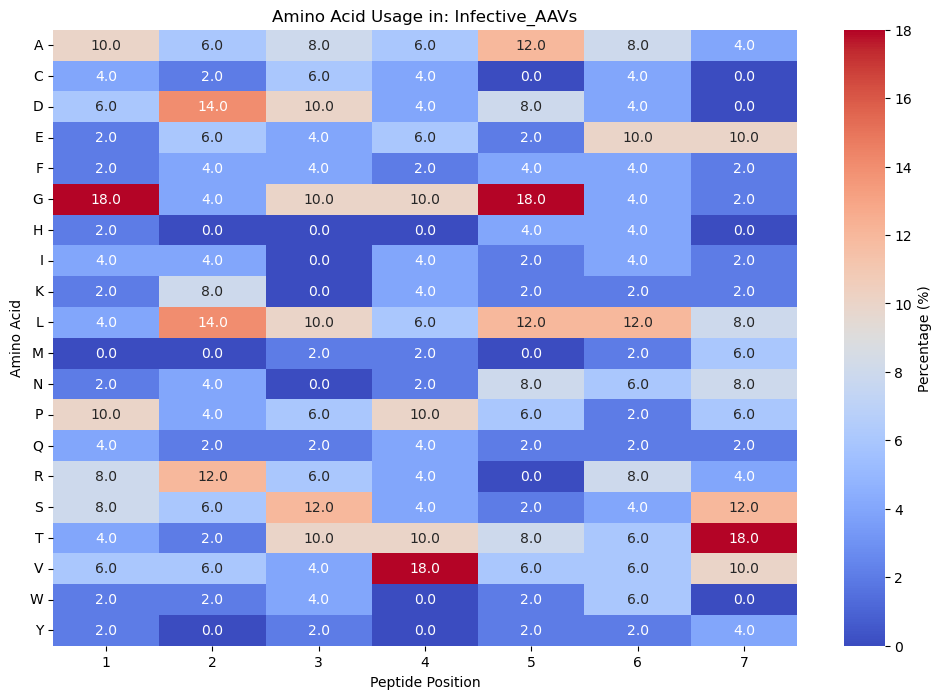

In [14]:
from plotting_functions import plot_amino_acid_heatmap
plot_amino_acid_heatmap(top_50_inf_aavs, "Infective_AAVs")

In [15]:
import pandas as pd
import numpy as np
import logomaker
import matplotlib.pyplot as plt

def create_bit_information_logo(df: pd.DataFrame, structure: str=None):

    # Function to create bit information matrix
    def create_bit_information_matrix(peptides: list) -> pd.DataFrame:
        """
        Create a bit information matrix for peptides of the same length.
        
        Parameters
            peptides : list of str : A list of peptides of the same length.
            
        Returns
            pd.DataFrame : A DataFrame containing the bit information
        """
        # Validate that all peptides are the same length
        peptide_length = len(peptides[0])
        if not all(len(peptide) == peptide_length for peptide in peptides):
            raise ValueError("All peptides must be of the same length")

        # Create an empty frequency matrix
        amino_acids = list("ACDEFGHIKLMNPQRSTVWY")
        freq_matrix = pd.DataFrame(0, index=amino_acids, columns=range(peptide_length))

        # Populate the frequency matrix
        for peptide in peptides:
            for i, amino_acid in enumerate(peptide):
                freq_matrix.loc[amino_acid, i] += 1

        # Normalize the matrix to get frequencies
        freq_matrix = freq_matrix.div(len(peptides))

        # Calculate Shannon entropy and bit information for each position
        bit_matrix = freq_matrix.copy()
        max_entropy = np.log2(len(amino_acids))  # log2(20)
        for col in freq_matrix.columns:
            # Shannon entropy
            entropy = -np.nansum(freq_matrix[col] * np.log2(freq_matrix[col].replace(0, np.nan)))
            # Information content
            ic = max_entropy - entropy
            # Scale frequencies by information content
            bit_matrix[col] = freq_matrix[col] * ic
            
        bit_matrix = bit_matrix.T

        return bit_matrix
    
    # if a structure is provided, filter the DataFrame
    if structure is not None:
        df = df[df["Structure"] == structure]
    
    # Compute the bit information matrix
    peptides = df["Peptide"].tolist()
    bit_matrix = create_bit_information_matrix(peptides)

    # Create a sequence logo using Logomaker
    logo = logomaker.Logo(bit_matrix,                         
                            color_scheme='chemistry',
                            vpad=.3,
                            width=.8)

    plt.ylabel("bits")
    plt.show()


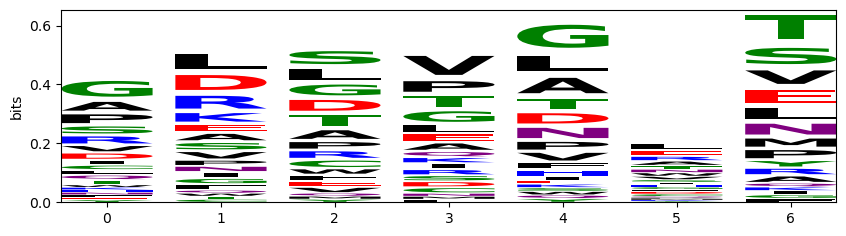

In [16]:
create_bit_information_logo(top_50_inf_aavs)

### For Motif search use MEME
meme sequences.fasta -protein -o meme_output_dir -nmotifs 10 -minw 5 -maxw 21